# Real vs Fake Classification

## Overview

This document provides detailed information about the Real vs Fake Classifier Model, including its architecture, training procedure, and usage guidelines.

## Introduction

The Real vs Fake Classifier Model is designed to classify objects in images. It has been trained on a diverse dataset and can predict if a given image is real or fake.

## Model Architecture

The model architecture is based on Convulutional Neural Networks. The final layer uses sigmoid activation to output class probabilities.

## Dataset

The model has been trained on a dataset consisting of 2 classes real or fake.

## Training Procedure

The model was trained using adam optimizer. Several training methods were tried starting with simple custom CNN to a more complex CNN and then with Data augmentation.

## Dependencies
This model relies on the following dependencies:

- TensorFlow
- NumPy

In [1]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers, models, utils
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Image Loading and Preprocessing

In [2]:
def load_and_preprocess_images(folder_path, label):
    images = []
    labels = []

    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = Image.open(img_path).convert("RGB")  # Load image as RGB
        img_array = np.array(img)
        img_array = img_array / 255.0  # Normalize pixel values to be between 0 and 1

        images.append(img_array)
        labels.append(label)
        
    return images, labels

In the next steps we are loading the images using the above defined function. We are loading the images in to a numpy array and along with its corresponding class. This will help us train the model.

In [3]:
real_images, real_labels = load_and_preprocess_images("/kaggle/input/realvsfakedata/archive2/train/REAL", label="real")

fake_images, fake_labels = load_and_preprocess_images("/kaggle/input/realvsfakedata/archive2/train/FAKE", label="fake")


In [4]:
all_images = np.array(real_images + fake_images)
all_labels = real_labels + fake_labels

In [5]:
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(all_labels)

## Train & Test Split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    all_images, encoded_labels, test_size=0.2, random_state=42
)

### Model Architecture

The model architecture is a sequential neural network with 3 convolutional and 2 dense layers. 

#### Model Layers

##### Convolutional Layers:

- First Convolutional Layer: 32 filters, (3, 3) kernel size, ReLU activation.
- MaxPooling Layer: (2, 2) pool size.
- Second Convolutional Layer: 64 filters, (3, 3) kernel size, ReLU activation.- 
- MaxPooling Layer: (2, 2) pool size.
- Third Convolutional Layer: 64 filters, (3, 3) kernel size, ReLU activation.

##### Flatten Layer: Flattens the input for the transition from convolutional layers to dense layers.

##### Dense Layers:
    - First Dense Layer: 64 units, ReLU activation.
    - Second Dense Layer: 11 units (output classes), sigmoid activation.


In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])


In [9]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [10]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [11]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/10
2750/2750 [==============================] - 25s 6ms/step - loss: 0.3772 - accuracy: 0.8283 - val_loss: 0.2677 - val_accuracy: 0.8890
Epoch 2/10
2750/2750 [==============================] - 14s 5ms/step - loss: 0.2473 - accuracy: 0.9001 - val_loss: 0.3891 - val_accuracy: 0.8316
Epoch 3/10
2750/2750 [==============================] - 14s 5ms/step - loss: 0.2050 - accuracy: 0.9187 - val_loss: 0.2143 - val_accuracy: 0.9179
Epoch 4/10
2750/2750 [==============================] - 14s 5ms/step - loss: 0.1792 - accuracy: 0.9292 - val_loss: 0.1844 - val_accuracy: 0.9294
Epoch 5/10
2750/2750 [==============================] - 15s 5ms/step - loss: 0.1639 - accuracy: 0.9364 - val_loss: 0.2406 - val_accuracy: 0.9098
Epoch 6/10
2750/2750 [==============================] - 14s 5ms/step - loss: 0.1466 - accuracy: 0.9428 - val_loss: 0.1899 - val_accuracy: 0.9283
Epoch 7/10
2750/2750 [==============================] - 15s 5ms/step - loss: 0.1368 - accuracy: 0.9464 - val_loss: 0.1755 - val_ac

In [12]:
train_loss, train_acc = model.evaluate(X_train, y_train)

2750/2750 [==============================] - 7s 3ms/step - loss: 0.1199 - accuracy: 0.9537


In [13]:
test_loss, test_acc = model.evaluate(X_test, y_test)

688/688 [==============================] - 2s 3ms/step - loss: 0.1755 - accuracy: 0.9327


In [14]:
print(len(X_train))

87992


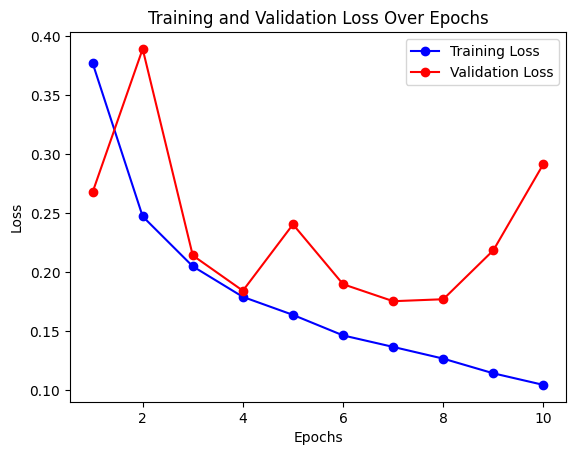

In [15]:

# Extract training and validation loss from the history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting the training and validation loss
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')

# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')

# Adding a legend
plt.legend()

# Display the plot
plt.show()


In [16]:
print(f"Train Accuracy: {train_acc}")
print(f"Test Accuracy: {test_acc}")


Train Accuracy: 0.9537457823753357
Test Accuracy: 0.9327242374420166


In [17]:
y_train_pred = model.predict(X_train)
y_train_pred_binary = np.round(y_train_pred).astype(int)


2750/2750 [==============================] - 5s 2ms/step


In [18]:
y_train_original = label_encoder.inverse_transform(y_train)
y_train_pred_original = label_encoder.inverse_transform(y_train_pred_binary)


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
y_pred = model.predict(X_test)
y_pred_binary = np.round(y_pred).astype(int)

# Convert numerical labels back to original labels
y_test_original = label_encoder.inverse_transform(y_test)
y_pred_original = label_encoder.inverse_transform(y_pred_binary)


688/688 [==============================] - 1s 2ms/step


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


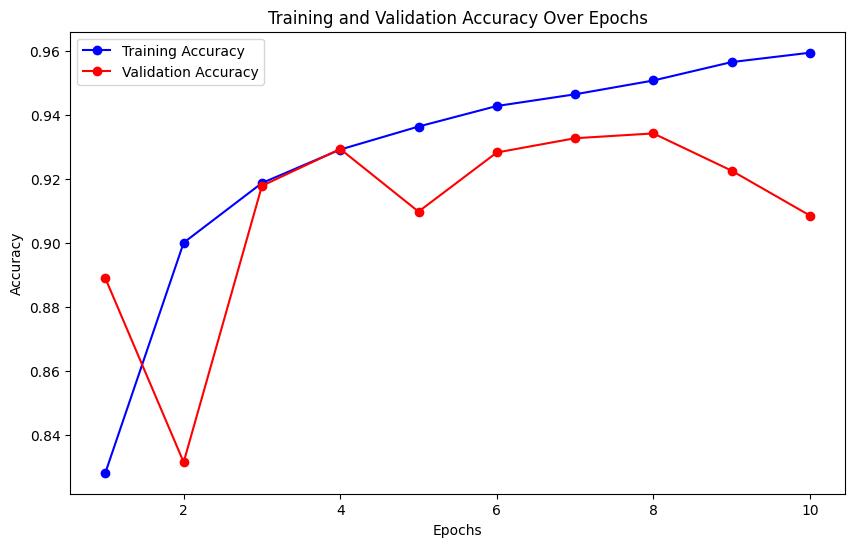

In [22]:


# Extract training and validation accuracy from the history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plotting the training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')

# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')

# Adding a legend
plt.legend()

# Display the plot
plt.show()


In [20]:

print("Train Classification Report:")
print(classification_report(y_train_original, y_train_pred_original))


print("Train Confusion Matrix:")
print(confusion_matrix(y_train_original, y_train_pred_original))

train_cm = cm = confusion_matrix(y_train_original, y_train_pred_original)


Train Classification Report:
              precision    recall  f1-score   support

        fake       0.97      0.94      0.95     44165
        real       0.94      0.97      0.95     43827

    accuracy                           0.95     87992
   macro avg       0.95      0.95      0.95     87992
weighted avg       0.95      0.95      0.95     87992

Train Confusion Matrix:
[[41340  2825]
 [ 1245 42582]]


In [21]:
print("Test Classification Report:")
print(classification_report(y_test_original, y_pred_original))

# Generate a confusion matrix
print("TestConfusion Matrix:")
print(confusion_matrix(y_test_original, y_pred_original))

test_cm = confusion_matrix(y_test_original, y_pred_original)

Test Classification Report:
              precision    recall  f1-score   support

        fake       0.95      0.91      0.93     10835
        real       0.92      0.95      0.94     11164

    accuracy                           0.93     21999
   macro avg       0.93      0.93      0.93     21999
weighted avg       0.93      0.93      0.93     21999

TestConfusion Matrix:
[[ 9873   962]
 [  518 10646]]


In [32]:
# Save the entire model to a HDF5 file
model.save("RealvsFakeDetectionRGB.h5")

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
